In [346]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
# Per looking at the data, best to join on Mouse ID 
# use a left join to avoid duplicate mouse IDs, keep it at Tumor Volume 45
merged_df = pd.merge(clinical_trial_df,mouse_drug_df,on='Mouse ID',how='left')


# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [347]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
#Calculate the mean of Tumor Volume mm3
avg_tumor_df = grouped_df.mean()
# Convert to DataFrame (need to reset the index)
avg_tumor_df = avg_tumor_df.reset_index()
# Preview DataFrame
avg_tumor_df.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [348]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = grouped_df.sem()
# Convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors)
tumor_standard_errors_df.reset_index(inplace=True)

# Preview DataFrame
tumor_standard_errors_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [349]:
# Minor Data Munging to Re-Format the Data Frames
#Per example, need to pivot to show Drugs as Column headers, make timepoint new index
pivot_avg_tumor_df = avg_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_avg_tumor_df.head(20)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


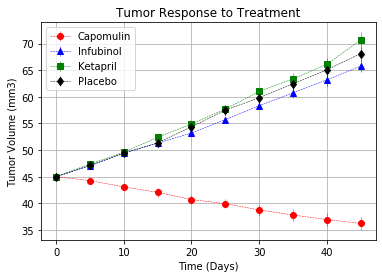

In [350]:
# Generate the Plot (with Error Bars)
#Create list to plot from 
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#For loop to iterate through the plot_list
for drug,marker,colors in drug_format_list:
    ste = tumor_standard_errors[drug]
    tumor_treatment_plt = plt.errorbar(pivot_avg_tumor_df.index,pivot_avg_tumor_df[drug],ste, fmt=marker,ls='--', label= labels, color=colors, linewidth=0.5)

legend_labels = []
for label in labels:
    legends = legend_labels.append(label)

plt.legend(legend_labels)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Show the Figure

# Save the Figure
plt.savefig(os.path.join('figures','Tumor_Response_to_Treatment.png'))

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [351]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
#Calculate the mean of Tumor Volume mm3
avg_met_df = grouped_met_df.mean()
# Convert to DataFrame (need to reset the index)
avg_met_df = avg_met_df.reset_index()
# Preview DataFrame
avg_met_df.head(15)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [352]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_standard_errors = grouped_met_df.sem()
# Convert to DataFrame
meta_standard_errors_df = pd.DataFrame(meta_standard_errors)
# Preview DataFrame
meta_standard_errors_df.head(10)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [353]:
# Minor Data Munging to Re-Format the Data Frames
#Per example, need to pivot to show Drugs as Column headers, make timepoint new index
pivot_avg_met_df = avg_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
pivot_avg_met_df.head(10)
#looks different than the df provided 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


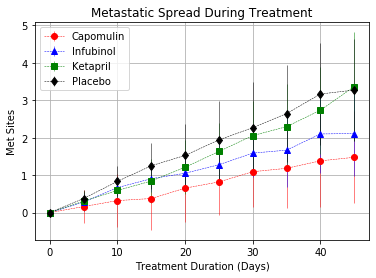

In [354]:
# Generate the Plot (with Error Bars)
#create list to plot data from 
met_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#For loop to iterate through the plot_list
for drug,marker,colors in met_format_list:
    ste = tumor_standard_errors[drug]
    meta_spread_plot = plt.errorbar(pivot_avg_met_df.index,pivot_avg_met_df[drug],ste,fmt=marker,ls='--',color=colors,linewidth=0.5) 

legend_labels = []
for label in labels:
    legends = legend_labels.append(label)

plt.legend(legend_labels)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')
plt.grid()
# Save the Figure

plt.savefig(os.path.join('figures','Metastatic_Spread_During_Treatment.png'))



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [355]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_drug_time = merged_df.groupby(['Drug','Timepoint'])['Mouse ID']
mice_drug_time_count = mice_drug_time.count()
mice_drug_time_sum = mice_drug_time.sum()

# Convert to DataFrame
mice_drug_time_count_df= pd.DataFrame(mice_drug_time_count)
# need to reset the index)
mice_drug_time_count_df = mice_drug_time_count_df.reset_index()
#Rename MouseId 
mice_drug_time_count_df= mice_drug_time_count_df.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
mice_drug_time_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [356]:
# Minor Data Munging to Re-Format the Data Frames
#Per example, need to pivot to show Drugs as Column headers, make timepoint new index
pivot_mice_drug_time_count_df= mice_drug_time_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview the Data Frame
pivot_mice_drug_time_count_df.head(10)
 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


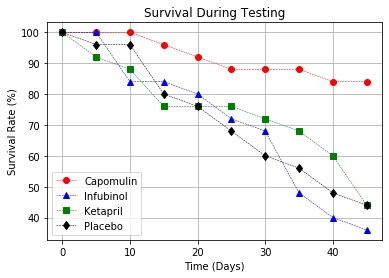

In [357]:
# Generate the Plot (Accounting for percentages)
#create list to plot data from 
survival_plot_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#For loop to iterate through the plot_list
#mice_total takes the first value in each drug list which is 100% (25)
for drug,marker,colors in survival_plot_list:
    mice_total = pivot_mice_drug_time_count_df[drug][0]
    mice_percentage = (pivot_mice_drug_time_count_df[drug]/ mice_total) *100
    survival_plot= plt.errorbar(pivot_avg_met_df.index,mice_percentage,fmt=marker,ls='--',color=colors, linewidth=0.5)

legend_labels = []
for label in labels:
    legends = legend_labels.append(label)
    
plt.legend(legend_labels) 
plt.title('Survival During Testing')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
    

# Show the Figure

# Save the Figure
plt.savefig(os.path.join('figures','Survival_During_Testing.png'))

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [358]:
# Calculate the percent changes for each drug
#Use the .ilock[-1] to get last column in df
per_change = (pivot_avg_tumor_df.iloc[-1]/(pivot_avg_tumor_df.iloc[0])-1)*100

# Display the data to confirm
per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

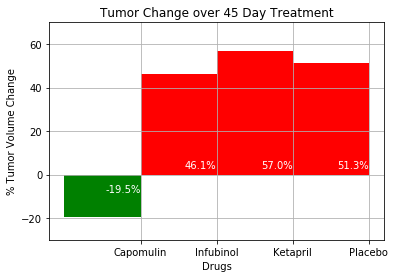

In [359]:
# Store all Relevant Percent Changes into a Tuple
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']

# Splice the data between passing and failing drugs
passing = per_change < 0

# Orient widths. Add labels, tick marks, etc. 
change_value = [(per_change[durg])for durg in drug_list]
change_barplot = plt.bar(drug_list,change_value,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drugs')
plt.title('Tumor Change over 45 Day Treatment')

#count for x coordinate location of value label

# Use functions to label the percentages of changes
def per_plot(change_values):
    x_position = 0

    for r in change_value:
        if r < 0:
            y_coor = -8
        else:
            y_coor = 3
        plt.text(x_position , y_coor, str(round(r, 1)) + '%', ha = 'right', color = 'white')
        x_position += 1


# Call functions to implement the function calls
per_plot(drug_list)


# Show the Figure

# Save the Figure
plt.savefig(os.path.join('figures','Tumor_Change_over_45 Day_Treatment.png'))

![Metastatic Spread During Treatment](../Images/change.png)

Analysis 

1) In the "Tumor Response to Treatment Graph", it is evident that Capomulin had the best results in reducing tumor volumes in mice over the course of the study. The rest of the drugs resulted in steady tumor growth over the course of the study. 

2) In the "Metastatic Spread During Treatment" graph, it is evident that there was a steady increase in metastatic spread regardless of the drug used. Capomulin had the slowest metastatic spread with the placebo having the fastest spread. 

3) In the "Tumor Change over 45 Day Treatment", it is evident that Capomulin was the only drug to reduce tumor volume. The other drugs had a relatively similar percentage change in tumor growth. 